# ET Noise Budget Curves with 10km, 15km, 20km arm length

These are plots of the noise budget curves and examples on how to work with them.

To plot these curves yourself, you will need:

* an up-to-date python installation (e.g. Anaconda)
* pygwinc (`pip install gwinc`)

In [1]:
import matplotlib.pyplot as plt
import gwinc
import numpy as np
from gwinc.ifo.noises import arm_cavity
from  ETLF import sqz_dual_fc
from  ETHF  import squeezingFC
%matplotlib inline

# ET High-Frequency

In [40]:
freq=np.logspace(0,4,3000)

ETD2011 = np.loadtxt('et_d.txt')
ETD2011[:,1]

array([3.4959517e-17, 3.5445436e-17, 3.5797734e-17, ..., 5.3888363e-24,
       5.4060171e-24, 5.4232613e-24])

## 10km HF

In [3]:
budgetHF = gwinc.load_budget('ETHF',freq=freq)
tracesHF = budgetHF.run()
budgetHF.ifo.Squeezer.FilterCavity=squeezingFC.computeFCParams(budgetHF.ifo)
#fig = gwinc.plot_budget(tracesHF)
#plt.ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
#plt.xlim([5, 1e4])
#plt.ylim([5e-26, 1e-22])

## 15km HF，12cm beam size，200kg

In [4]:
budgetHF15kmA = gwinc.load_budget('ETHF',freq=freq)
budgetHF15kmA.ifo.Infrastructure.Length=15000
budgetHF15kmA.ifo.Optics.Curvature.ITM=7750
budgetHF15kmA.ifo.Optics.Curvature.ETM=7750
budgetHF15kmA.ifo.Optics.SRM.Transmittance=0.07
budgetHF15kmA.ifo.Squeezer.FilterCavity=squeezingFC.computeFCParams(budgetHF15kmA.ifo)
tracesHF15kmA = budgetHF15kmA.run()
#fig = gwinc.plot_budget(tracesHF15kmA)
#plt.ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
#plt.ylim([5e-26, 1e-22])

In [5]:
print('Filter cavity input mirror T={}'.format(format(budgetHF15kmA.ifo.Squeezer.FilterCavity.Ti,".6f")),
      'Filter cavity input mirror Detune={}'.format(format(budgetHF15kmA.ifo.Squeezer.FilterCavity.fdetune,".6f")),sep="\n")

Filter cavity input mirror T=0.000636
Filter cavity input mirror Detune=-25.274014


## 15km HF，13.5cm beam size，200kg

In [5]:
budgetHF15kmB = gwinc.load_budget('ETHF',freq=freq)
budgetHF15kmB.ifo.Infrastructure.Length=15000
budgetHF15kmB.ifo.Optics.Curvature.ITM=7650
budgetHF15kmB.ifo.Optics.Curvature.ETM=7650
budgetHF15kmB.ifo.Optics.SRM.Transmittance=0.07
budgetHF15kmB.ifo.Materials.MassRadius=0.68/2
budgetHF15kmB.ifo.Materials.MassThickness=0.25
budgetHF15kmB.ifo.Squeezer.FilterCavity=squeezingFC.computeFCParams(budgetHF15kmB.ifo)
tracesHF15kmB = budgetHF15kmB.run()
#fig = gwinc.plot_budget(tracesHF15kmB)
#plt.ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
#plt.ylim([5e-26, 1e-22]) 

## 20km HF，12cm beam size，200kg

In [6]:
budgetHF20kmA = gwinc.load_budget('ETHF',freq=freq)
budgetHF20kmA.ifo.Infrastructure.Length=20000
budgetHF20kmA.ifo.Optics.Curvature.ITM=10620
budgetHF20kmA.ifo.Optics.Curvature.ETM=10620
budgetHF20kmA.ifo.Optics.SRM.Transmittance=0.05
budgetHF20kmA.ifo.Squeezer.FilterCavity=squeezingFC.computeFCParams(budgetHF20kmA.ifo)
tracesHF20kmA = budgetHF20kmA.run()
#fig = gwinc.plot_budget(tracesHF20kmA)
#plt.ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
#plt.ylim([5e-26, 1e-22])

In [7]:
print('Filter cavity input mirror T={}'.format(format(budgetHF20kmA.ifo.Squeezer.FilterCavity.Ti,".6f")),
      'Filter cavity input mirror Detune={}'.format(format(budgetHF20kmA.ifo.Squeezer.FilterCavity.fdetune,".6f")),sep="\n")

Filter cavity input mirror T=0.000535
Filter cavity input mirror Detune=-21.243293


## 20km HF，15cm beam size，200kg

In [8]:
budgetHF20kmB = gwinc.load_budget('ETHF',freq=freq)
budgetHF20kmB.ifo.Infrastructure.Length=20000
budgetHF20kmB.ifo.Optics.Curvature.ITM=10240
budgetHF20kmB.ifo.Optics.Curvature.ETM=10240
budgetHF20kmB.ifo.Materials.MassRadius=0.75/2
budgetHF20kmB.ifo.Materials.MassThickness=0.21
budgetHF20kmB.ifo.Optics.SRM.Transmittance=0.05
budgetHF20kmB.ifo.Squeezer.FilterCavity=squeezingFC.computeFCParams(budgetHF20kmB.ifo)
tracesHF20kmB = budgetHF20kmB.run()
#fig = gwinc.plot_budget(tracesHF20kmB)
#plt.ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
#plt.ylim([5e-26, 1e-22])

# ET Low-Frequency

## 10km LF

In [9]:
budgetLF = gwinc.load_budget('ETLF',freq=freq)
budgetLF.ifo.Squeezer.FilterCavity=sqz_dual_fc.computeFCParams(budgetLF.ifo)
tracesLF = budgetLF.run()
#fig = gwinc.plot_budget(tracesLF)
#plt.ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
#plt.legend(loc='upper right')
#plt.ylim([5e-26, 1e-21])

In [10]:
print('Filter cavity 1 input mirror T={}'.format(format(budgetLF.ifo.Squeezer.FilterCavity[0].Ti,".6f")),
      'Filter cavity 1 input mirror Detune={}'.fOormat(format(budgetLF.ifo.Squeezer.FilterCavity[0].fdetune,".6f")),
      'Filter cavity 2 input mirror T={}'.format(format(budgetLF.ifo.Squeezer.FilterCavity[1].Ti,".6f")),
      'Filter cavity 2 input mirror Detune={}'.format(format(budgetLF.ifo.Squeezer.FilterCavity[1].fdetune,".6f")),sep="\n")

Filter cavity 1 input mirror T=0.000368
Filter cavity 1 input mirror Detune=-6.695223
Filter cavity 2 input mirror T=0.001432
Filter cavity 2 input mirror Detune=25.345230


## 10km LF Room Temperature

In [11]:
budgetLF_290K = budgetLF
budgetLF_290K.ifo.Materials = budgetHF.ifo.Materials
budgetLF_290K.ifo.Suspension.Temp = budgetHF.ifo.Suspension.Temp
budgetLF_290K.ifo.Infrastructure.Temp = budgetHF.ifo.Infrastructure.Temp
tracesLF_290K = budgetLF_290K.run()

## 15km LF, 9cm beam size

In [12]:
budgetLF15kmA = gwinc.load_budget('ETLF',freq=freq)
budgetLF15kmA.ifo.Optics.SRM.Transmittance=0.14
budgetLF15kmA.ifo.Optics.SRM.Tunephase=0.4
budgetLF15kmA.ifo.Infrastructure.Length=15000
budgetLF15kmA.ifo.Optics.Curvature.ITM=10670
budgetLF15kmA.ifo.Optics.Curvature.ETM=10670
budgetLF15kmA.ifo.Squeezer.FilterCavity=sqz_dual_fc.computeFCParams(budgetLF15kmA.ifo)
tracesLF15kmA = budgetLF15kmA.run()
#fig = gwinc.plot_budget(tracesLF15kmA)
#plt.ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
#plt.legend(loc='upper right')
#plt.ylim([5e-26, 1e-21])

In [13]:
print('Filter cavity 1 input mirror T={}'.format(format(budgetLF15kmA.ifo.Squeezer.FilterCavity[0].Ti,".6f")),
      'Filter cavity 1 input mirror Detune={}'.format(format(budgetLF15kmA.ifo.Squeezer.FilterCavity[0].fdetune,".6f")),
      'Filter cavity 2 input mirror T={}'.format(format(budgetLF15kmA.ifo.Squeezer.FilterCavity[1].Ti,".6f")),
      'Filter cavity 2 input mirror Detune={}'.format(format(budgetLF15kmA.ifo.Squeezer.FilterCavity[1].fdetune,".6f")),sep="\n")

Filter cavity 1 input mirror T=0.000276
Filter cavity 1 input mirror Detune=-5.400951
Filter cavity 2 input mirror T=0.001373
Filter cavity 2 input mirror Detune=26.037861


## 15km LF Room Temperature, 9cm beam size

In [14]:
budgetLF15kmA_290K = budgetLF15kmA
budgetLF15kmA_290K.ifo.Materials = budgetHF15kmA.ifo.Materials
budgetLF15kmA_290K.ifo.Suspension.Temp = budgetHF15kmA.ifo.Suspension.Temp
budgetLF15kmA_290K.ifo.Infrastructure.Temp = budgetHF15kmA.ifo.Infrastructure.Temp
tracesLF15kmA_290K = budgetLF15kmA_290K.run()

## 20km LF, 10cm beam size, 45cm mirror

In [15]:
budgetLF20kmA = gwinc.load_budget('ETLF',freq=freq)
budgetLF20kmA.ifo.Optics.PRM.Transmittance=0.08
budgetLF20kmA.ifo.Optics.SRM.Transmittance=0.105
budgetLF20kmA.ifo.Optics.SRM.Tunephase=0.3
budgetLF20kmA.ifo.Infrastructure.Length=20000
budgetLF20kmA.ifo.Optics.Curvature.ITM=16000
budgetLF20kmA.ifo.Optics.Curvature.ETM=16000
budgetLF20kmA.ifo.Optics.Loss=73e-6
budgetLF20kmA.ifo.Squeezer.FilterCavity=sqz_dual_fc.computeFCParams(budgetLF20kmA.ifo)
tracesLF20kmA = budgetLF20kmA.run()
#fig = gwinc.plot_budget(tracesLF20kmA)
#plt.ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
#plt.legend(loc='upper right')
#plt.ylim([5e-26, 1e-21])

In [16]:
print('Filter cavity 1 input mirror T={}'.format(format(budgetLF20kmA.ifo.Squeezer.FilterCavity[0].Ti,".6f")),
      'Filter cavity 1 input mirror Detune={}'.format(format(budgetLF20kmA.ifo.Squeezer.FilterCavity[0].fdetune,".6f")),
      'Filter cavity 2 input mirror T={}'.format(format(budgetLF20kmA.ifo.Squeezer.FilterCavity[1].Ti,".6f")),
      'Filter cavity 2 input mirror Detune={}'.format(format(budgetLF20kmA.ifo.Squeezer.FilterCavity[1].fdetune,".6f")),sep="\n")

Filter cavity 1 input mirror T=0.000160
Filter cavity 1 input mirror Detune=-3.387534
Filter cavity 2 input mirror T=0.001290
Filter cavity 2 input mirror Detune=26.518002


## 20km LF, 10cm beam size, 45cm mirror, 5.6W input power   

In [17]:
budgetLF20kmB = gwinc.load_budget('ETLF',freq=freq)
budgetLF20kmB.ifo.Laser.Power=5.6
budgetLF20kmB.ifo.Optics.PRM.Transmittance=0.08
budgetLF20kmB.ifo.Optics.SRM.Transmittance=0.105
budgetLF20kmB.ifo.Optics.SRM.Tunephase=0.3
budgetLF20kmB.ifo.Infrastructure.Length=20000
budgetLF20kmB.ifo.Optics.Curvature.ITM=16000
budgetLF20kmB.ifo.Optics.Curvature.ETM=16000
budgetLF20kmB.ifo.Optics.Loss=73e-6
budgetLF20kmB.ifo.Squeezer.FilterCavity=sqz_dual_fc.computeFCParams(budgetLF20kmB.ifo)
tracesLF20kmB = budgetLF20kmB.run()
#fig = gwinc.plot_budget(tracesLF20kmB)
#plt.ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
#plt.legend(loc='upper right')
#plt.ylim([5e-26, 1e-21])

## 20km LF Room Temperature, 10cm beam size, 45cm mirror, 5.6W input power   

In [18]:
budgetLF20kmB_290K = budgetLF20kmB
budgetLF20kmB_290K.ifo.Materials = budgetHF20kmA.ifo.Materials
budgetLF20kmB_290K.ifo.Suspension.Temp = budgetHF20kmA.ifo.Suspension.Temp
budgetLF20kmB_290K.ifo.Infrastructure.Temp = budgetHF20kmA.ifo.Infrastructure.Temp
tracesLF20kmB_290K = budgetLF20kmB_290K.run()

## 20km LF, 10cm beam size, 50cm mirror

In [19]:
budgetLF20kmC = gwinc.load_budget('ETLF',freq=freq)
budgetLF20kmC.ifo.Optics.SRM.Transmittance=0.105
budgetLF20kmC.ifo.Optics.SRM.Tunephase=0.3
budgetLF20kmC.ifo.Infrastructure.Length=20000
budgetLF20kmC.ifo.Optics.Curvature.ITM=16000
budgetLF20kmC.ifo.Optics.Curvature.ETM=16000
budgetLF20kmC.ifo.Materials.MassRadius=0.25
budgetLF20kmC.ifo.Materials.MassThickness=0.21
budgetLF20kmC.ifo.Squeezer.FilterCavity=sqz_dual_fc.computeFCParams(budgetLF20kmC.ifo)
tracesLF20kmC = budgetLF20kmC.run()
#fig = gwinc.plot_budget(tracesLF20kmL)
#plt.ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
#plt.legend(loc='upper right')
#plt.ylim([5e-26, 1e-21])

In [30]:
## Cryogenic LF curves
ET10km=1/(1/tracesLF.psd+1/tracesHF.psd)
ET15km=1/(1/tracesLF15kmA.psd+1/tracesHF15kmA.psd)
ET20km=1/(1/tracesLF20kmA.psd+1/tracesHF20kmA.psd)
ET1520km=1/(1/tracesLF15kmA.psd+1/tracesHF20kmA.psd)
ET20kmB=1/(1/tracesLF20kmB.psd+1/tracesHF20kmA.psd)
ET20kmC=1/(1/tracesLF20kmC.psd+1/tracesHF20kmA.psd)
## Room temperature LF curves
ET10km_290K=1/(1/tracesLF_290K.psd+1/tracesHF.psd)
ET15km_290K=1/(1/tracesLF15kmA_290K.psd+1/tracesHF15kmA.psd)
ET20kmB_290K=1/(1/tracesLF20kmB_290K.psd+1/tracesHF20kmA.psd)

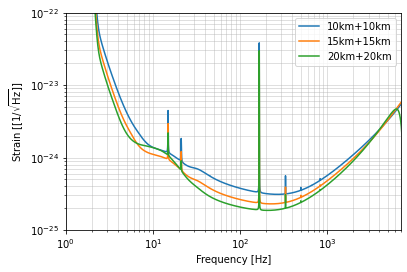

In [31]:
## Plots w/o changes to ET-LF mirrors or power
fig=plt.figure(figsize=(6., 4.))
ax=fig.add_subplot(111)
ax.loglog(freq,np.sqrt(ET10km),label='10km+10km')
ax.loglog(freq,np.sqrt(ET15km),label='15km+15km')
ax.loglog(freq,np.sqrt(ET20km),label='20km+20km')
ax.legend()
ax.set_xlim([1,7000])
ax.set_ylim([1e-25, 1e-22])
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
ax.grid(True,which='both',alpha=0.5)

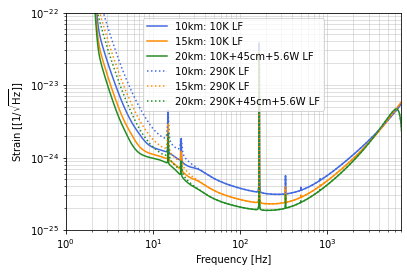

In [32]:
## Plots of room temperature LF and HF, as well as modified LF mirror radius and input power 
fig=plt.figure(figsize=(6., 4.))
cycler = plt.cycler(linestyle=['-', '-', '-', '--', '--', '--'],
                    color=['royalblue', 'darkorange', 'forestgreen','royalblue', 'darkorange', 'forestgreen'],
)
ax=fig.add_subplot(111)
ax.set_prop_cycle(cycler)
ax.loglog(freq,np.sqrt(ET10km),label='10km: 10K LF')
ax.loglog(freq,np.sqrt(ET15km),label='15km: 10K LF')
ax.loglog(freq,np.sqrt(ET20kmB),label='20km: 10K+45cm+5.6W LF')
ax.loglog(freq,np.sqrt(ET10km_290K),':',label='10km: 290K LF')
ax.loglog(freq,np.sqrt(ET15km_290K),':',label='15km: 290K LF')
ax.loglog(freq,np.sqrt(ET20kmB_290K),':',label='20km: 290K+45cm+5.6W LF')
ax.legend()
ax.set_xlim([1,7000])
ax.set_ylim([1e-25, 1e-22])
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
ax.grid(True,which='both',alpha=0.5)


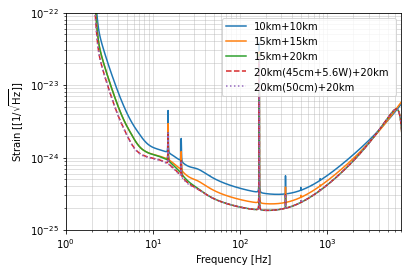

In [33]:
## Plots with different arm lengths for LF and HF, as well as modified LF mirror radius and input power 
fig=plt.figure(figsize=(6., 4.))
ax=fig.add_subplot(111)
ax.loglog(freq,np.sqrt(ET10km),label='10km+10km')
ax.loglog(freq,np.sqrt(ET15km),label='15km+15km')
ax.loglog(freq,np.sqrt(ET1520km),label='15km+20km')
ax.loglog(freq,np.sqrt(ET20kmB),'--',label='20km(45cm+5.6W)+20km ')
ax.loglog(freq,np.sqrt(ET20kmC),':',label='20km(50cm)+20km ')
ax.legend()
ax.set_xlim([1,7000])
ax.set_ylim([1e-25, 1e-22])
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
ax.grid(True,which='both',alpha=0.5)

## Curves for ET-OSB for CoBA study

In [35]:
## Now in columns and grouped by arm length: frequecy : HF : LF : HF+LF

## 10km option
np.savetxt('./CoBA/CoBA_sensitivity_curves/ET10km_columns.txt', np.column_stack([freq, tracesHF.psd, tracesLF.psd, ET10km]))

## 15km option
np.savetxt('./CoBA/CoBA_sensitivity_curves/ET15km_columns.txt', np.column_stack([freq, tracesHF15kmA.psd, tracesLF15kmA.psd, ET15km]))

## 20km option
np.savetxt('./CoBA/CoBA_sensitivity_curves/ET20km_columns.txt', np.column_stack([freq, tracesHF20kmA.psd, tracesLF20kmB.psd, ET20kmB]))

## 10km Room Temperature option
np.savetxt('./CoBA/CoBA_sensitivity_curves/ET10km_290K_columns.txt', np.column_stack([freq, tracesHF.psd, tracesLF_290K.psd, ET10km_290K]))

## 15km Room Temperature option
np.savetxt('./CoBA/CoBA_sensitivity_curves/ET15km_290K_columns.txt', np.column_stack([freq, tracesHF15kmA.psd, tracesLF15kmA_290K.psd, ET15km_290K]))

## 20km Room Temperature option
np.savetxt('./CoBA/CoBA_sensitivity_curves/ET20km_290K_columns.txt', np.column_stack([freq, tracesHF20kmA.psd, tracesLF20kmB_290K.psd, ET20kmB_290K]))



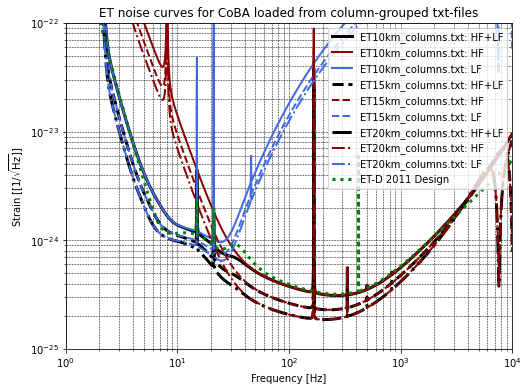

In [42]:
## Checking cryo LF
ET10     = np.loadtxt('./CoBA/CoBA_sensitivity_curves/ET10km_columns.txt')
ET10freq = ET10[:,0]
ET10HF   = ET10[:,1]
ET10LF   = ET10[:,2]
ET10xylo = ET10[:,3]

ET15     = np.loadtxt('./CoBA/CoBA_sensitivity_curves/ET15km_columns.txt')
ET15freq = ET15[:,0]
ET15HF   = ET15[:,1]
ET15LF   = ET15[:,2]
ET15xylo = ET15[:,3]

ET20     = np.loadtxt('./CoBA/CoBA_sensitivity_curves/ET20km_columns.txt')
ET20freq = ET20[:,0]
ET20HF   = ET20[:,1]
ET20LF   = ET20[:,2]
ET20xylo = ET20[:,3]



# ET15=np.loadtxt('./CoBA_studies/CoBA_sensitivity_curves/15km_LFcryo+HF.txt')
# ET20=np.loadtxt('./CoBA_studies/CoBA_sensitivity_curves/20km_LFcryoHighPower+HF.txt')
# ETHF15=np.loadtxt('./CoBA_studies/CoBA_sensitivity_curves/15km_HF.txt')
# ETHF20=np.loadtxt('./CoBA_studies/CoBA_sensitivity_curves/20km_HF.txt')

figCoBA=plt.figure(figsize=(8, 6))
cycler = plt.cycler(linestyle=['-', '-', '-', '--', '--', '--', ':', ':', ':'],
                    color=['black', 'darkred', 'royalblue','black', 'darkred', 'royalblue','black', 'darkred', 'royalblue'],
                    linewidth = [3,2,2,3,2,2,3,2,2]
)
ax=figCoBA.add_subplot(111)
ax.set_prop_cycle(cycler)
ax.loglog(ET10freq,np.sqrt(ET10xylo),linewidth = 3,label='ET10km_columns.txt: HF+LF')
ax.loglog(ET10freq,np.sqrt(ET10HF),label='ET10km_columns.txt: HF')
ax.loglog(ET10freq,np.sqrt(ET10LF),label='ET10km_columns.txt: LF')



ax.loglog(ET15freq,np.sqrt(ET15xylo),'--',linewidth = 3,label='ET15km_columns.txt: HF+LF')
ax.loglog(ET15freq,np.sqrt(ET15HF),'--',label='ET15km_columns.txt: HF')
ax.loglog(ET15freq,np.sqrt(ET15LF),'--',label='ET15km_columns.txt: LF')

ax.loglog(ET20freq,np.sqrt(ET20xylo),'-.',linewidth = 3,label='ET20km_columns.txt: HF+LF')
ax.loglog(ET20freq,np.sqrt(ET20HF),'-.',label='ET20km_columns.txt: HF')
ax.loglog(ET20freq,np.sqrt(ET20LF),'-.',label='ET20km_columns.txt: LF')
# ax.loglog(ET15xylo[0],np.sqrt(ET15xylo[1]),label='15km_LFcryo+HF.txt')
# ax.loglog(ET20xylo[0],np.sqrt(ET20xylo[1]),label='20km_LFcryoHighPower+HF.txt')
# ax.loglog(ETHF15[0],np.sqrt(ETHF15[1]),'--',label='15km_HF.txt')
# ax.loglog(ETHF20[0],np.sqrt(ETHF20[1]),':',label='20km_HF.txt')
ax.loglog(ETD2011[:,0],ETD2011[:,1],':',linewidth=3,color='g',label='ET-D 2011 Design',)
ax.legend()
plt.title('ET noise curves for CoBA loaded from column-grouped txt-files', y=1, fontsize = 'large')
ax.grid(which='both',color='k',linestyle='--',linewidth=0.5)
ax.set_xlim([1,10000])
ax.set_ylim([1e-25, 1e-22])
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
plt.savefig('./CoBA/CoBA_sensitivity_curves/ET_10K_sens_columns.png')

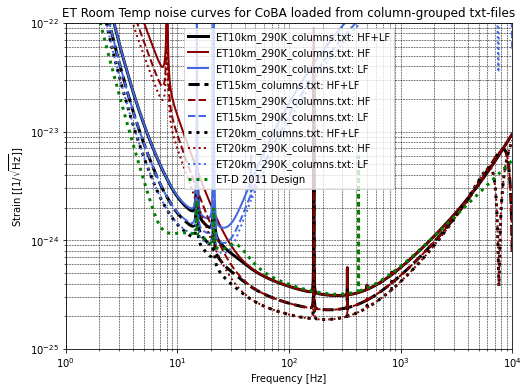

In [43]:
## Checking Room Temp LF
ET10_290K     = np.loadtxt('./CoBA/CoBA_sensitivity_curves/ET10km_290K_columns.txt')
ET10freq_290K = ET10_290K[:,0]
ET10HF_290K   = ET10_290K[:,1]
ET10LF_290K   = ET10_290K[:,2]
ET10xylo_290K = ET10_290K[:,3]

ET15_290K     = np.loadtxt('./CoBA/CoBA_sensitivity_curves/ET15km_290K_columns.txt')
ET15freq_290K = ET15_290K[:,0]
ET15HF_290K   = ET15_290K[:,1]
ET15LF_290K   = ET15_290K[:,2]
ET15xylo_290K = ET15_290K[:,3]

ET20_290K     = np.loadtxt('./CoBA/CoBA_sensitivity_curves/ET20km_290K_columns.txt')
ET20freq_290K = ET20_290K[:,0]
ET20HF_290K   = ET20_290K[:,1]
ET20LF_290K   = ET20_290K[:,2]
ET20xylo_290K = ET20_290K[:,3]

figCoBA_290K=plt.figure(figsize=(8, 6))

cycler = plt.cycler(linestyle=['-', '-', '-', '--', '--', '--', ':', ':', ':'],
                    color=['black', 'darkred', 'royalblue','black', 'darkred', 'royalblue','black', 'darkred', 'royalblue'],
                    linewidth = [3,2,2,3,2,2,3,2,2]
)
ax=figCoBA_290K.add_subplot(111)
ax.set_prop_cycle(cycler)
ax.loglog(ET10freq_290K,np.sqrt(ET10xylo_290K),linewidth = 3,label='ET10km_290K_columns.txt: HF+LF')
ax.loglog(ET10freq_290K,np.sqrt(ET10HF_290K),label='ET10km_290K_columns.txt: HF')
ax.loglog(ET10freq_290K,np.sqrt(ET10LF_290K),label='ET10km_290K_columns.txt: LF')

ax.loglog(ET15freq_290K,np.sqrt(ET15xylo_290K),label='ET15km_columns.txt: HF+LF')
ax.loglog(ET15freq_290K,np.sqrt(ET15HF_290K),label='ET15km_290K_columns.txt: HF')
ax.loglog(ET15freq_290K,np.sqrt(ET15LF_290K),label='ET15km_290K_columns.txt: LF')

ax.loglog(ET20freq_290K,np.sqrt(ET20xylo_290K),label='ET20km_columns.txt: HF+LF')
ax.loglog(ET20freq_290K,np.sqrt(ET20HF_290K),label='ET20km_290K_columns.txt: HF')
ax.loglog(ET20freq_290K,np.sqrt(ET20LF_290K),label='ET20km_290K_columns.txt: LF')
# ax.loglog(ET15xylo[0],np.sqrt(ET15xylo[1]),label='15km_LFcryo+HF.txt')
# ax.loglog(ET20xylo[0],np.sqrt(ET20xylo[1]),label='20km_LFcryoHighPower+HF.txt')
# ax.loglog(ETHF15[0],np.sqrt(ETHF15[1]),'--',label='15km_HF.txt')
# ax.loglog(ETHF20[0],np.sqrt(ETHF20[1]),':',label='20km_HF.txt')
ax.loglog(ETD2011[:,0],ETD2011[:,1],':',linewidth=3,color='g',label='ET-D 2011 Design',)
ax.legend()
plt.title('ET Room Temp noise curves for CoBA loaded from column-grouped txt-files', y=1, fontsize = 'large')
ax.grid(which='both',color='k',linestyle='--',linewidth=0.5)
ax.set_xlim([1,10000])
ax.set_ylim([1e-25, 1e-22])
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Strain [[$1 / \sqrt{\mathrm{Hz}}$]]')
plt.savefig('./CoBA/CoBA_sensitivity_curves/ET_290K_sens_columns.png')